# Distribuciones muestrales

En este cuaderno utilizaremos los datos de la NHANES para explorar las distribuciones muestrales de la estadística. Este es un tema algo más conceptual que el que hemos encontrado antes al trabajar con los datos de la NHANES. Algunas de las ilustraciones que se tratan a continuación no son cosas que se harían típicamente en un análisis de datos, sino que pretenden aclarar algunos conceptos importantes sobre los métodos estadísticos. Sin embargo, incluso estos métodos tienen sus usos en la práctica, por ejemplo, los enfoques demostrados a continuación pueden utilizarse para demostrar cómo se comporta una estadística en un entorno "no estándar", o para evaluar cuántos datos se necesitan para responder a una pregunta con confianza.



In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("nhanes_2015_2016.csv")

# Distribución muestral de la media
Las distribuciones de muestreo describen cómo varía el valor de una estadística calculada a partir de datos cuando se obtienen muestras repetidas de datos. Esto puede explorarse matemáticamente o utilizando un ordenador para simular datos repetidos de una población hipotética. Cuando se trabaja con datos no simulados (es decir, de un estudio como la NHANES), normalmente no tenemos la capacidad de obtener explícitamente una "copia independiente" de la muestra para "ver" realmente su distribución muestral. Sin embargo, podemos hacer una "submuestra" de un conjunto de datos para imitar lo que ocurriría si tomáramos una muestra repetida de la población que la produjo. Una submuestra es una muestra aleatoria extraída de un conjunto de datos mayor, que contiene sólo una fracción de sus observaciones.

En la celda del cuaderno que aparece a continuación, submuestreamos repetidamente dos subconjuntos disjuntos de tamaño 100 de los datos de la NHANES, calculamos la media de la presión arterial sistólica dentro de cada uno de estos dos subconjuntos y, a continuación, calculamos la diferencia entre estas dos medias. Esta diferencia refleja la "variación fortuita" que se habría observado si el proyecto NHANES sólo hubiera contado con los recursos necesarios para muestrear a 100 participantes para su estudio. Al muestrear dos subconjuntos de tamaño 100 y comparar las medias calculadas resultantes, podemos ver cómo los hallazgos de dos investigadores que estudian independientemente la misma población podrían diferir entre sí por azar.

El proceso de submuestreo descrito anteriormente se repite 1.000 veces, por lo que podemos ver cómo dos muestras de tamaño 100 de la población de la NHANES tienden a diferir en términos de su presión arterial sistólica media.



In [6]:
m = 100 # tamaño de la muestra
sbp = [] #Almacenamiento de las diferencias medias de nuestras submuestras

for i in range(1000):
    dx = df.sample(2*m) # se requieren dos submuestras (2*m)
    dx1 = dx.iloc[0:m, :] # Primeras submuestra
    dx2 = dx.iloc[m:, :] # segunda submuestra
    sbp.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean()) # diferencia de valores de media de BPXSY1
    

<AxesSubplot:ylabel='Count'>

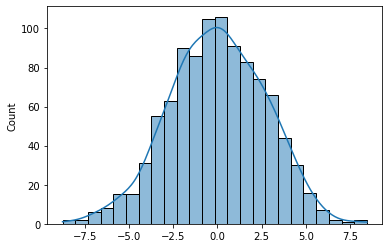

In [11]:
sns.histplot(x=sbp, kde=True)

Observamos el histograma de las 1000 diferencias medias generadas anteriormente. Vemos que suelen estar entre 5 negativo y 5 positivo. Esto significa que dos investigadores que estudian de forma independiente la presión arterial en la misma población pueden obtener por casualidad resultados que difieren en unas 5 unidades, pero es bastante improbable que obtengan resultados que difieran por casualidad en más de 10 unidades.



In [13]:
pd.Series(sbp).describe()

count    1000.000000
mean       -0.000696
std         2.698640
min        -8.763983
25%        -1.779108
50%        -0.031035
75%         1.914611
max         8.461431
dtype: float64

Los resultados mostrados anteriormente indican que la media de la presión arterial sistólica calculada para dos muestras, cada una de ellas con 100 personas, suele diferir en unos 2,8 mm/Hg (la desviación estándar), y rara vez difiere en más de 5 mm/Hg.

El tamaño de la muestra es un factor determinante de las fluctuaciones del azar en cualquier estadística. Arriba utilizamos muestras de tamaño 100, abajo realizamos el mismo análisis utilizando muestras de tamaño 400.

count    1000.000000
mean        0.050219
std         1.339600
min        -3.846154
25%        -0.800802
50%         0.032231
75%         0.935521
max         4.062135
dtype: float64

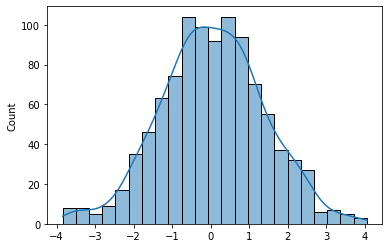

In [14]:
m = 400 # tamaño muestra
sbp = []

for i in range(1000):
    dx = df.sample(2*m)
    dx1 = dx.iloc[0:m,:]
    dx2 = dx.iloc[m:, :]
    sbp.append(dx1.BPXSY1.mean()-dx2.BPXSY1.mean())

sns.histplot(sbp, kde=True)
pd.Series(sbp).describe()

Vemos que con muestras de tamaño 400, la desviación estándar es de alrededor de 1,38, que es casi la mitad de lo que era cuando utilizábamos muestras de tamaño 100. La menor desviación estándar indica que las fluctuaciones fortuitas de la presión arterial sistólica media son menores cuando tenemos un tamaño de muestra mayor. Esto implica que somos capaces de estimar la presión arterial sistólica media de la población con más precisión cuando tenemos muestras de tamaño 400 en comparación con cuando tenemos muestras de tamaño 100.

Es importante destacar que el aumento del tamaño de la muestra en un factor de 4 (de 100 a 400) condujo a una reducción de la desviación estándar en un factor de 2. Este comportamiento de escala es muy común en estadística: el aumento del tamaño de la muestra en un factor de K conduce a una reducción de la desviación estándar en un factor de sqrt(K). Así, para un aumento del factor 4 en el tamaño de la muestra, vemos una reducción del factor 2 en la desviación estándar. Del mismo modo, para un aumento del factor 9 en el tamaño de la muestra, normalmente veremos una reducción del factor 3 en la desviación estándar.

# Distribución muestral del coeficiente de correlación
Como se ha comentado en las clases, muchos estadísticos más complejos que la media muestral se comportan de forma similar a la media en cuanto a su comportamiento muestral. A continuación, modificamos el análisis de submuestreo anterior para considerar el coeficiente de correlación de Pearson entre la presión arterial sistólica y la diastólica. Obsérvese que la desviación estándar sigue disminuyendo en aproximadamente un factor de 2 cuando el tamaño de la muestra se multiplica por cuatro (de 100 a 400).

Este breve programa de Python utiliza bucles for anidados. El bucle exterior gestiona el tamaño de la muestra, y el bucle interior obtiene 1000 submuestras con un tamaño de muestra determinado, calcula los coeficientes de correlación de dos submuestras y registra su diferencia.

In [21]:
for m in 100, 400: # m = tamaño de las submuestras (100 y 400)
    sbp = [] #guarda la relación de coeficientes de diferentes muestras
    for i in range(1000):
        dx = df.sample(2*m)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m: , :]
        r1 = np.corrcoef(dx1.loc[:,["BPXSY1","BPXDI1"]].dropna().T)
        r2 = np.corrcoef(dx2.loc[:,["BPXSY1","BPXDI1"]].dropna().T)
        sbp.append(r1-r2)
    print("m=%d"%m, np.std(sbp), np.sqrt(2/m))

m=100 0.12402975508979215 0.1414213562373095
m=400 0.06366966761925218 0.07071067811865475


La simulación anterior muestra que cuando el tamaño de la submuestra aumenta de 100 a 400 (un factor de 4), la desviación estándar de la diferencia entre dos coeficientes de correlación disminuye aproximadamente en un factor de 2. La expresión matemática sqrt(2 / m) es una aproximación a esta desviación estándar que puede calcularse sin acceso a ningún dato.

## Forma Distribuciones de Muestreo

Antes nos hemos centrado en la magnitud de la diferencia entre una estadística calculada sobre dos muestras independientes de una población. En cambio, aquí nos centramos en la forma de la distribución de los estadísticos calculados sobre submuestras. Como se ha comentado en las clases, el teorema del límite central implica que muchos (pero no todos) los estadísticos tienen distribuciones muestrales aproximadamente normales, aunque los datos subyacentes no se acerquen a una distribución normal.

Ilustraremos este fenómeno utilizando los datos de la presión arterial sistólica del estudio NHANES. En primer lugar, utilizaremos un histograma para observar la distribución de los valores individuales de la presión arterial sistólica. Obsérvese que está algo sesgada hacia la derecha.

<AxesSubplot:xlabel='BPXSY1', ylabel='Count'>

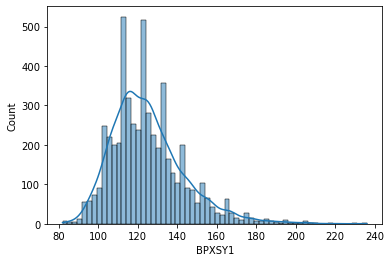

In [22]:
sns.histplot(x=df.BPXSY1.dropna(), kde = True)

A continuación, calculamos 1000 medias muestrales de 1000 submuestras de tamaño 50 e inspeccionamos su distribución.

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


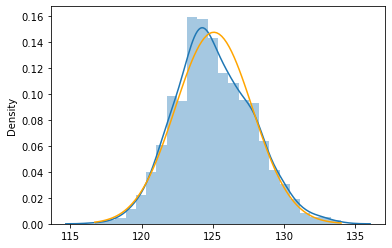

In [33]:
m = 50
sbp = []
for i in range(1000):
    dx = df.sample(m)
    sbp.append(dx.BPXSY1.dropna().mean())
sns.distplot(x=sbp, kde=True)
# Las líneas siguientes trazan la densidad de una aproximación normal a los datos generados anteriormente
x = np.linspace(np.min(sbp), np.max(sbp),100)
from scipy.stats.distributions import norm
y = norm.pdf(x, np.mean(sbp), np.std(sbp))
plt.plot(x,y,color="orange")

Los gráficos anteriores muestran que, si bien la distribución de las medidas individuales de presión arterial sistólica está algo sesgada hacia la derecha, la distribución de las medias del tamaño 50 es aproximadamente simétrica. La distribución de las medias también es aproximadamente normal, como muestra la curva naranja, que es la aproximación normal que mejor se ajusta a los datos.

In [34]:
import random
random.seed(123)
mu = 100
sigma = 1
random.normalvariate(mu,sigma)
m = [random.normalvariate(mu,sigma) for i in range(3)]
print(m)

[100.09299998647415, 100.71877584655846, 99.5808198230117]


In [ ]:
import numpy as np
np.random.seed(123)

p = [i for i in range(1,101)]
m = np.random.choice(p,10)
print(m)
